# Guided Project Unsupervised Learning

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import zipfile
import os
os.getcwd()
os.chdir('/Users/margueritevergne/Downloads')

In [58]:
df=pd.read_csv('./BreadBasket_DMS.csv')

In [59]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [60]:
df.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [61]:
df['Datetime']=pd.to_datetime(df.Date+' '+df.Time)
df.head()

,Date,Time,Transaction,Item,Datetime
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57


In [62]:
df.Item.nunique()

95

In [63]:
df.Item.value_counts()

Coffee                           5471
Bread                            3325
Tea                              1435
Cake                             1025
Pastry                            856
NONE                              786
Sandwich                          771
Medialuna                         616
Hot chocolate                     590
Cookies                           540
Brownie                           379
Farm House                        374
Muffin                            370
Alfajores                         369
Juice                             369
Soup                              342
Scone                             327
Toast                             318
Scandinavian                      277
Truffles                          193
Coke                              185
Spanish Brunch                    172
Fudge                             159
Baguette                          152
Jam                               149
Tiffin                            146
Mineral wate

In [64]:
df.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [65]:
beverage = ['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies']
other = ['NONE', 'Christmas common', 'Gift voucher', "Valentine's card", 'Tshirt', 'Afternoon with the baker', 'Postcard', 'Siblings', 'Nomad bag', 'Adjustment', 'Drinking chocolate spoons ', 'Coffee granules ']
kids = ["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit']
snacks = ['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars']
bread = ['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian']
breakfast_pastry = ['Muffin', 'Pastry', 'Medialuna', 'Scone']
dessert = ['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone']
condiments = ['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil']
breakfast = ['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami']
lunch = ['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']
other_food = [x for x in df.Item.unique() if x not in beverage 
                and x not in other and x not in kids and x not in snacks 
                and x not in bread and x not in breakfast_pastry 
                and x not in dessert and x not in condiments 
                and x not in breakfast and x not in lunch]

In [66]:
lst_cat={'beverage':beverage,'other':other,'kids':kids,'snacks':snacks,'bread':bread,'breakfast_pastry':breakfast_pastry,'dessert':dessert,'condiments':condiments,'breakfast':breakfast,'lunch':lunch,'other_food':other_food}

## Dummies

1. Replace in the original columns and get_dummies
2. Create columns direclty

In [67]:
for i,j in lst_cat.items():
    df[i]=np.where(df.Item.isin(j),1,0)

In [68]:
df.head()

,Date,Time,Transaction,Item,Datetime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,other_food
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0,0
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,0,0,1,0,0,0


## Processing the Data

In [69]:
df_grouped=df.groupby(['Transaction','Datetime']).sum()
df_grouped

,,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,other_food
Transaction,Datetime,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,0
3,2016-10-30 10:07:57,1,0,0,0,0,0,1,1,0,0,0
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,0
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,0
6,2016-10-30 10:16:55,0,0,0,0,0,3,0,0,0,0,0
7,2016-10-30 10:19:12,2,0,0,0,0,2,0,0,0,0,0
8,2016-10-30 10:20:51,0,0,0,0,1,1,0,0,0,0,0
9,2016-10-30 10:21:59,0,0,0,0,1,1,0,0,0,0,0


In [70]:
df_grouped.reset_index(level=['Datetime'],inplace=True)
df_grouped.head()

,Datetime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,other_food
Transaction,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,0
3,2016-10-30 10:07:57,1,0,0,0,0,0,1,1,0,0,0
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,0
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,0


In [71]:
df_grouped['hour']=df_grouped.Datetime.dt.hour
df_grouped['day']=df_grouped.Datetime.dt.day_name()

In [72]:
df_grouped.day.value_counts()

Saturday     2068
Friday       1488
Sunday       1264
Thursday     1252
Tuesday      1203
Monday       1135
Wednesday    1121
Name: day, dtype: int64

In [73]:
df_grouped.hour.value_counts()

11    1445
12    1347
10    1267
13    1163
14    1130
9     1007
15     924
16     583
8      375
17     160
18      52
19      34
7       16
20      15
22       7
23       3
21       2
1        1
Name: hour, dtype: int64

In [74]:
df_grouped=pd.get_dummies(data=df_grouped,columns=['day'])
df_grouped.drop('Datetime',inplace=True,axis=1)

In [75]:
df_grouped.head()

,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,other_food,hour,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
Transaction,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,0,9,0,0,0,1,0,0,0
2,0,0,0,0,2,0,0,0,0,0,0,10,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,1,0,0,0,10,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,1,0,0,0
5,1,0,0,0,1,1,0,0,0,0,0,10,0,0,0,1,0,0,0


In [76]:
df_grouped['is_weekend']=np.where((df_grouped['day_Saturday']+df_grouped['day_Sunday'])>0,1,0)
df_grouped.is_weekend.value_counts()

0    6199
1    3332
Name: is_weekend, dtype: int64

In [77]:
df_grouped.drop(df_grouped.columns[-2:],axis=1,inplace=True)

In [78]:
df_grouped.shape

(9531, 18)

In [83]:
from sklearn.decomposition import PCA
pca=PCA(3)

In [85]:
pc=pca.fit_transform(df_grouped)
ppc=pd.DataFrame(data=pc,columns=['pc1','pc2','pc3'])
ppc.head()

,pc1,pc2,pc3
0,3.197278,-0.926494,0.245138
1,2.227759,-1.274171,1.183286
2,2.107511,0.425074,-0.217798
3,2.198823,-0.580476,-0.782895
4,2.206675,0.037580,0.443637


In [82]:
pca.explained_variance_ratio_ #kind of r2. the first pc is the one that most explain your model

array([0.67803564, 0.08888644, 0.03439925, 0.03402446])

In [86]:
pca.explained_variance_ratio_

array([0.67803564, 0.08888644, 0.03439925])

In [87]:
from sklearn.cluster import KMeans
kmeans=KMeans(5)
df_cluster=kmeans.fit(ppc)
df_cluster.cluster_centers_

array([[-3.60460912, -0.01926484,  0.03545971],
       [ 3.0832657 , -0.28272713,  0.0408223 ],
       [-1.34356384,  0.01842343, -0.04094915],
       [ 0.54836956, -0.51045017,  0.02531579],
       [ 1.40473342,  0.84499591, -0.05528012]])

In [88]:
df_grouped['labels']=df_cluster.fit_predict(ppc)
df_grouped.labels.value_counts()

2    2712
1    2510
4    2054
3    1399
0     856
Name: labels, dtype: int64

In [89]:
df_grouped.reset_index('Transaction',inplace=True)

In [90]:
df_merged=pd.merge(df,df_grouped[['Transaction','labels']],on='Transaction',how='outer')

In [96]:
df_merged.head()

,Date,Time,Transaction,Item,Datetime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,other_food,labels
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0,3
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0,2
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0,2
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0,0,2
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,0,0,1,0,0,0,2


In [93]:
df_merged.labels.value_counts()

2    5979
1    5797
4    4883
3    2740
0    1894
Name: labels, dtype: int64

In [98]:
pd.crosstab(df_grouped.hour,df_grouped.labels)

labels,0,1,2,3,4
hour,,,,,
1,0,0,0,1,0
7,0,0,0,16,0
8,0,0,0,375,0
9,0,0,0,1007,0
10,0,0,1267,0,0
11,0,0,1445,0,0
12,0,1347,0,0,0
13,0,1163,0,0,0
14,0,0,0,0,1130


In [102]:
df_merged["day"]= df_merged.Datetime.dt.day_name()

In [103]:
pd.crosstab(df_merged.day,df_merged.labels).apply(lambda r: round(r/r.sum(),2), axis=0)


labels,0,1,2,3,4
day,,,,,
Friday,0.17,0.15,0.14,0.20,0.14
Monday,0.11,0.11,0.11,0.11,0.12
Saturday,0.26,0.21,0.24,0.24,0.21
Sunday,0.06,0.18,0.18,0.07,0.17
Thursday,0.13,0.12,0.12,0.14,0.13
Tuesday,0.13,0.13,0.10,0.12,0.12
Wednesday,0.14,0.11,0.10,0.12,0.12


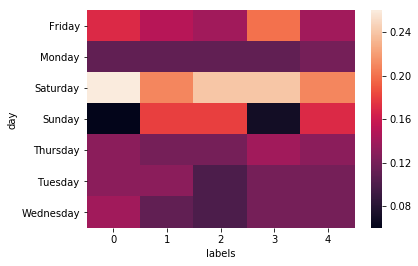

In [104]:
import seaborn as sns
sns.heatmap(pd.crosstab(df_merged.day,df_merged.labels).apply(lambda r: round(r/r.sum(),2), axis=0))


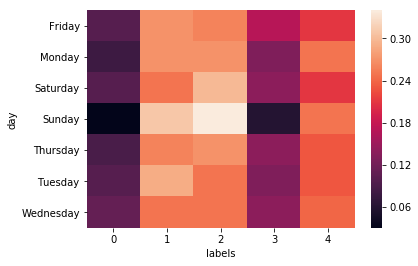

In [105]:
sns.heatmap(pd.crosstab(df_merged.day,df_merged.labels).apply(lambda r: round(r/r.sum(),2), axis=1))
# % is calculated by row = by day

In [107]:
a=df_merged.groupby('labels').Item.value_counts()
a

labels  Item                         
0       Coffee                           408
        Bread                            250
        Tea                              175
        Cake                             154
        Hot chocolate                     94
        Cookies                           80
        Alfajores                         64
        Brownie                           46
        Juice                             43
        Medialuna                         41
        Muffin                            36
        Sandwich                          34
        Scone                             32
        Scandinavian                      28
        Pastry                            26
        Truffles                          24
        Farm House                        23
        Tiffin                            23
        Coke                              22
        Fudge                             21
        Tshirt                            21
        Mineral w

In [117]:
b=a.to_frame('counts').reset_index()
b

,labels,Item,counts
0,0,Coffee,408
1,0,Bread,250
2,0,Tea,175
3,0,Cake,154
4,0,Hot chocolate,94
5,0,Cookies,80
6,0,Alfajores,64
7,0,Brownie,46
8,0,Juice,43
9,0,Medialuna,41


In [118]:
b.set_index('Item',inplace=True)
b

,labels,counts
Item,,
Coffee,0,408
Bread,0,250
Tea,0,175
Cake,0,154
Hot chocolate,0,94
Cookies,0,80
Alfajores,0,64
Brownie,0,46
Juice,0,43


In [119]:
b.groupby('labels').counts.nlargest(5)

labels  Item         
0       Coffee            408
        Bread             250
        Tea               175
        Cake              154
        Hot chocolate      94
1       Coffee           1347
        Bread             814
        Sandwich          396
        Tea               364
        NONE              326
2       Coffee           1766
        Bread            1036
        Pastry            354
        Tea               332
        Medialuna         233
3       Coffee            795
        Bread             574
        Pastry            250
        Medialuna         169
        Tea               124
4       Coffee           1155
        Bread             651
        Tea               440
        Cake              356
        Sandwich          246
Name: counts, dtype: int64

# DBSCAN

In [140]:
from sklearn.datasets import make_moons
moons=make_moons(1000,shuffle=True,noise=0.1)

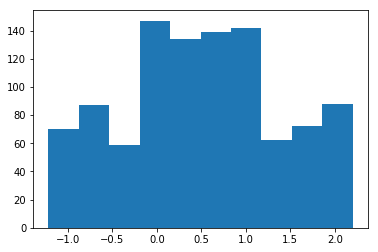

In [141]:
plt.hist(moons[0][:,0])
plt.show()

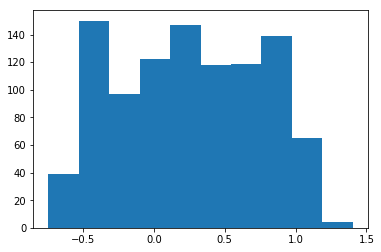

In [142]:
plt.hist(moons[0][:,1])
plt.show()

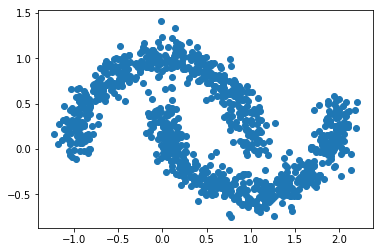

In [143]:
plt.scatter(moons[0][:,0],moons[0][:,1])
plt.show()

In [144]:
from sklearn.cluster import DBSCAN

dbscan= DBSCAN(eps=0.1).fit(moons[0])
dbscan.labels_

array([ 0,  0,  0,  1,  1,  1,  0,  0,  1,  1,  1,  1,  0,  1, -1,  1,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0, -1,  0,
        0,  1,  0,  1,  0,  0,  1,  0,  1,  0,  0,  1,  1,  1,  0,  1,  0,
        1,  1,  1,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,  1,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,
        1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  1,  1,  1,  1,  0,  1,  0,
        1,  1,  0, -1,  1,  0,  1,  1,  0,  1,  1,  0,  1,  0,  1,  0,  1,
        0,  0,  1,  1,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0, -1,
        1,  1,  1,  0,  0,  0,  1,  0,  1,  0,  0,  1,  0,  1,  0,  1,  1,
        1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,
        0,  0,  1, -1,  1,  1,  1,  1,  0,  1,  1,  1,  0,  1,  0,  1,  1,
        0, -1,  0,  1,  0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,
        0,  1,  0,  0,  1,  0, -1,  1,  0,  0,  1,  0,  0,  0,  1,  0,  1,
        0,  1,  1,  0,  1

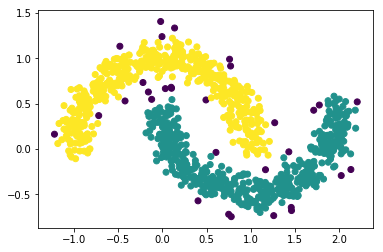

In [145]:
plt.scatter(moons[0][:,0],moons[0][:,1],c = dbscan.labels_)
plt.show()

# GMM

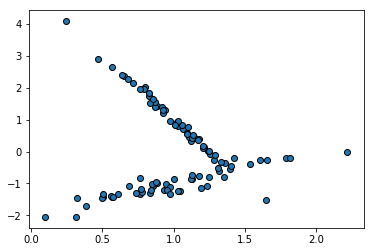

In [153]:
from sklearn.datasets import make_classification
from sklearn import mixture

X=make_classification(n_features=2,n_redundant=0,n_informative=2,n_clusters_per_class=1)
plt.scatter(X[0][:,0],X[0][:,1],marker='o',edgecolor='k')

In [147]:
?make_classification

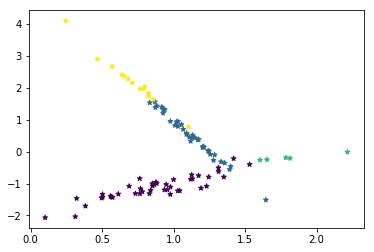

In [155]:
gmm = mixture.GaussianMixture(4, covariance_type="full").fit(X[0])
plt.scatter(X[0][:,0],X[0][:,1], marker="*", s=25, c=gmm.predict(X[0]))